# Machine Learning Workflow: Regression

Let us elevate your knowledge on Machine Learning by getting hands-on experience with Regression task. From the past activities, you learn that classification requires discrete values on targets. In regression, the targets are in continuous values, rather than discrete. There is no changes in the workflow, as shown in the figure below. The only difference is that the new target transitions to different data types, from `int` to `float`.


By the end of this laboratory notebook, you will be able to **implement solutions in any ML regression tasks.**




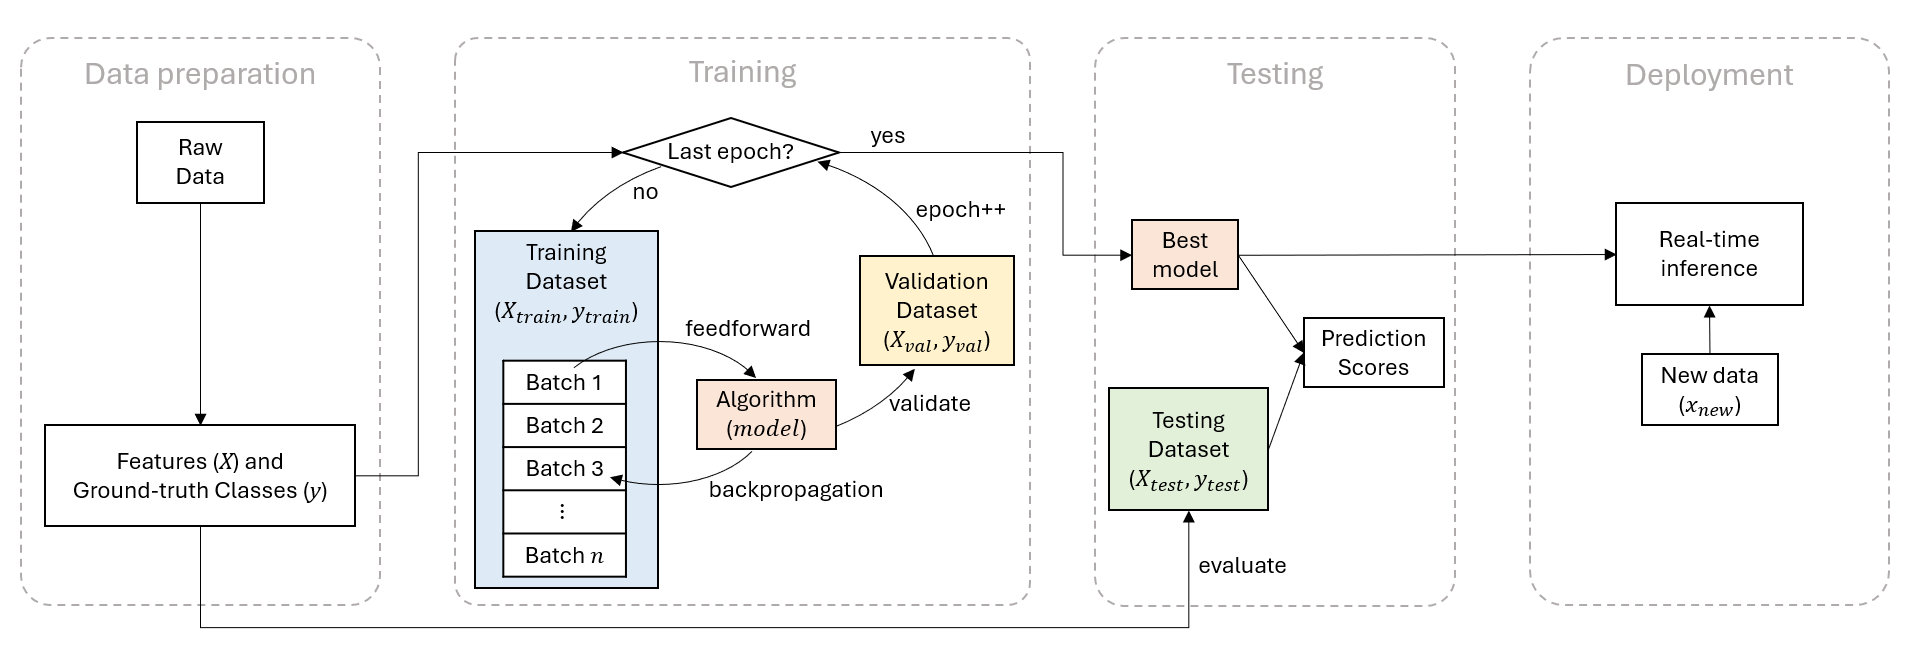

## 1. Data Preparation




You can download the `boston_house.csv` from this [GDrive](https://drive.google.com/file/d/1KEkOfr_ubEL4F-a4zhwGEa9T906hWpim/view?usp=drive_link).

In [168]:
import pandas as pd
# Load CSV locally
file_path = "boston_house.csv"  # make sure the file is in the same folder
raw_data = pd.read_csv(file_path)



Determine the `features` and `ground-truth classes`. Once again, we represent the array of features as the `X` variable, while the ground-truth classes (or the targets) as the `y` variable.

In [ ]:
X = raw_data.iloc[:, :-1]
y = raw_data.iloc[:, -1]


Features shape: (506, 13)
Target shape: (506,)


Then, you need to perform data splitting: 70% training, 15% validation, and 15% testing.


In [157]:

from sklearn.model_selection import train_test_split

# Split into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Split temp into validation (15%) and testing (15%)
# Since temp is 30% of the dataset, splitting it 50/50 gives 15% each
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)


Training set size: (354, 13)
Validation set size: (76, 13)
Testing set size: (76, 13)


Alright! So now, you need to remember that:


1.   `X_train` and `y_train` correspond to the features and targets in the training set.
2.   `X_val` and `y_val` correspond to the features and targets in the validation set.
3.   `X_test` and `y_test` correspond to the features and targets in the training set.



## 2. Training

Declare your own ML regression algorithms. Go to [sklearn page](https://scikit-learn.org/stable/supervised_learning.html) for the various options and their documentations.




In [158]:
from sklearn.neural_network import MLPRegressor

# define SGDRegressor
model = MLPRegressor(hidden_layer_sizes=(200, 100, 50),
                     max_iter=1000)


Assign values for `epoch` and `batch size`.


In [159]:
epochs = 500
batch_size = 32

Since we will employ batch processing, you need to re-use the function below to create create batches.

In [160]:
def get_batches(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield X_batch, y_batch

Next thing you need to do is to define your own regression loss function. You can optionally call available APIs of different regression loss functions in the sklearn modules. Go to [3.4.1. Scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [161]:
from sklearn.metrics import mean_squared_error

# define loss function
loss = mean_squared_error


You can run the code snippet below to begin the training process. The program might not run, unless you have assigned values for `X_train`, `y_train`, `X_val`, `y_val`, `epochs`, `batch_size`, `model`, and `loss`.

In [162]:
import numpy as np
history = {'train_losses':[], 'val_losses':[], 'best_model':None, 'best_epoch':0}

for epoch in range(epochs):
    # Train the model in batches
    for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
        model.partial_fit(X_batch, y_batch)  # <- remove classes=

    # Calculate training loss
    y_train_pred = model.predict(X_train)  # <- use predict(), not predict_proba()
    train_loss = loss(y_train, y_train_pred)

    # Calculate validation loss
    y_val_pred = model.predict(X_val)
    val_loss = loss(y_val, y_val_pred)

    print(f"Epoch {epoch+1}/{epochs}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")

    # save model only at best validation loss
    if (history['best_model'] is None) or (val_loss < min(history['val_losses'], default=float('inf'))):
        history['best_model'], history['best_epoch'] = model, epoch

    # save losses
    history['train_losses'].append(train_loss)
    history['val_losses'].append(val_loss)



Epoch 1/500: train_loss=245.2347, val_loss=269.7700
Epoch 2/500: train_loss=111.0591, val_loss=109.4073
Epoch 3/500: train_loss=79.6642, val_loss=77.6404
Epoch 4/500: train_loss=67.2058, val_loss=60.2026
Epoch 5/500: train_loss=65.6111, val_loss=61.4336
Epoch 6/500: train_loss=62.5608, val_loss=57.3879
Epoch 7/500: train_loss=58.4090, val_loss=53.2646
Epoch 8/500: train_loss=54.7731, val_loss=47.1034
Epoch 9/500: train_loss=52.8165, val_loss=45.6733
Epoch 10/500: train_loss=51.6385, val_loss=45.1128
Epoch 11/500: train_loss=49.5961, val_loss=42.8392
Epoch 12/500: train_loss=48.0239, val_loss=42.0591
Epoch 13/500: train_loss=46.3365, val_loss=39.9306
Epoch 14/500: train_loss=45.0348, val_loss=39.9232
Epoch 15/500: train_loss=43.5747, val_loss=37.1661
Epoch 16/500: train_loss=41.8953, val_loss=37.4779
Epoch 17/500: train_loss=40.3536, val_loss=36.0918
Epoch 18/500: train_loss=39.2813, val_loss=34.1232
Epoch 19/500: train_loss=37.9891, val_loss=33.2316
Epoch 20/500: train_loss=38.4214, va

Observe the trend of the training and validation losses. Going down together is better!

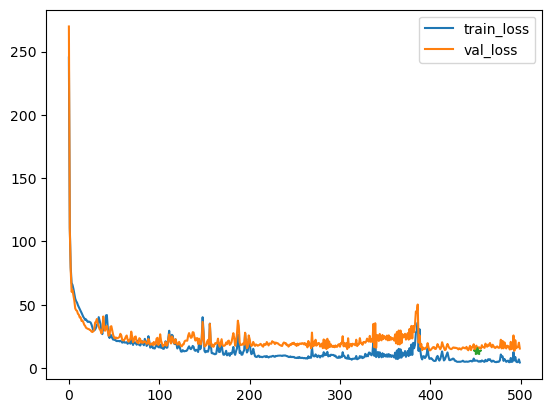

In [163]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history['train_losses'], label='train_loss')
plt.plot(range(epochs), history['val_losses'], label='val_loss')
plt.plot(history['best_epoch'], history['val_losses'][history['best_epoch']], marker='*')
plt.legend()
plt.show()

**Warning**: The common mistake with programmers is that they forgot to save the model at the best validation loss (minimum val_loss). The `history` variable tracks the best model.

Next step is you validate your model using the validation set through `X_val` and `y_val`. Go to [3.4.4 Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and select the metrics that best describe your results.

In [164]:
from sklearn import metrics

best_model = history['best_model']
# add correct metrics

y_val_pred = best_model.predict(X_val)
print("\n--- Validation Set Metrics ---")
print("Mean Squared Error:", metrics.mean_squared_error(y_val, y_val_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_val, y_val_pred))
print("R2 Score:", metrics.r2_score(y_val, y_val_pred))


--- Validation Set Metrics ---
Mean Squared Error: 15.35314637447163
Mean Absolute Error: 2.581263929490183
R2 Score: 0.7786773460387333


## 3. Testing

Apply the same evaluation metrics to testing set (`X_test` and `y_test`).

In [ ]:
y_test_pred = best_model.predict(X_test)
print("f")



--- Test Set Metrics ---
Mean Squared Error (MSE): 10.762803027136451
Mean Absolute Error (MAE): 2.3559733579301576
R2 Score: 0.8645836776111759


Note: Do not forget to save your model offline.

In [ ]:
import joblib

model_name = 'mlpregressor_boston_house.pkl'
joblib.dump(best_model, model_name)

['mlpregressor_bayotko.pkl']

In [167]:
# End of laboratory notebook. Nothing follows ...